In [1]:
import importlib

import numpy as np
from matplotlib import pyplot as plt

import utils
importlib.reload(utils)

import sweeps
importlib.reload(sweeps)

import spin_models
importlib.reload(spin_models)
from spin_models import Ising, IsingEnsemble

In [2]:
temperatures = np.geomspace(0.1, 10, 32)
ising = IsingEnsemble(lattice_shape=(32, 32),
                      n_ensemble=32,
                      temperatures=temperatures)
ising.sample(n_sweeps=2**14, 
             warmup_ratio=0.25, 
             cluster_update_interval=2**3,
             pt_interval=2**3)

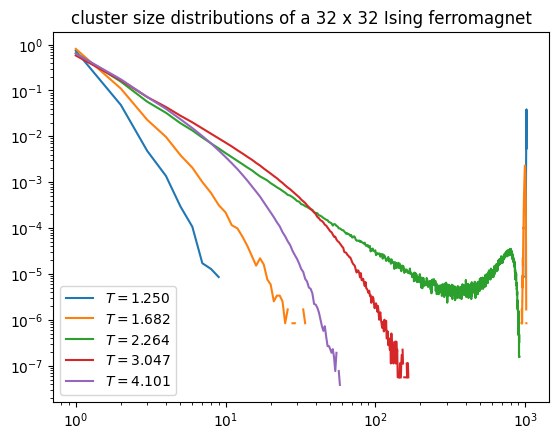

In [3]:
csds = ising.get_csds()[17:27:2].T
csds[csds == 0] = np.nan

legends = [f"$T = {temp:.3f}$" for temp in temperatures[17:27:2]]

plt.plot(np.arange(1, 32**2+1), csds)
plt.xscale('log')
plt.yscale('log')
plt.legend(legends)
plt.title("cluster size distributions of a 32 x 32 Ising ferromagnet")
plt.show()